# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


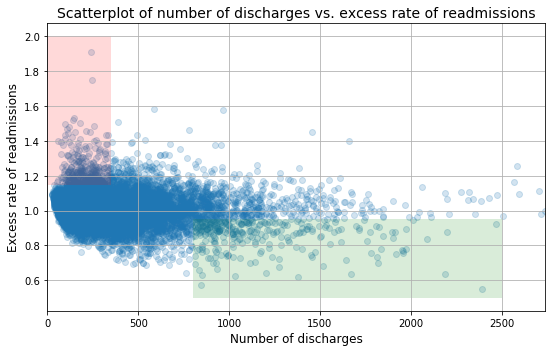

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [9]:
#Removing observations where the dependant and/or independant variable is null/not available

In [10]:
df = hospital_read_df[hospital_read_df['Excess Readmission Ratio'].notnull() & hospital_read_df['Number of Discharges'].notnull()]
df = df[hospital_read_df['Number of Discharges']!='Not Available']
df['Number of Discharges'] = df['Number of Discharges'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


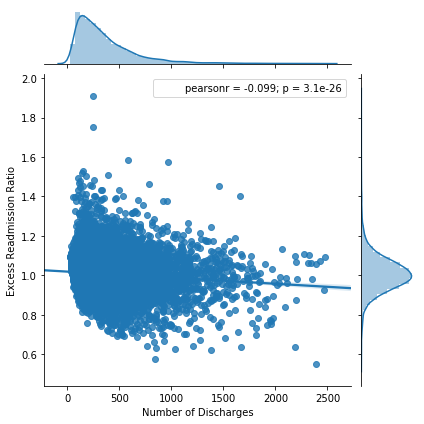

In [11]:
import seaborn as sns
#sns.jointplot(x="total_bill", y="tip", data=tips)
x = df['Number of Discharges'][df['Number of Discharges']< 2500]
y = df['Excess Readmission Ratio'][df['Number of Discharges']< 2500]
sns.jointplot(x, y, data=df, kind = 'reg')
plt.show()

It looks like there is a very small negative correlation, a Pearson R > -0.01, between Excess Readmission Ratio and Number of Discharges.

**Test of Proportions**

Is there truly an increased incedence of Excess Readmission Ratio for "large" hospitals vs. "small" hospitals?

The null hyposthesis is that there is no difference in the incidence of the Excess Readmission Ration being greater than 1 in small hospitals, defined as hospitals with less than 100 discharges and large hospitals, hospitals with greater than 1,000 discharges. The alternative hypothesis is that there is a difference.

A ztest of proportions will be used.

In [12]:
#Percent of observations in each category
print(round((sum(df['Number of Discharges']<100)/len(df['Number of Discharges']))*100),"% of observations had <100 discharges")
print(round((sum(df['Number of Discharges']>1000)/len(df['Number of Discharges']))*100),"% of observations had >1,000 discharges")

10 % of observations had <100 discharges
4 % of observations had >1,000 discharges


In [13]:
#Evaluating data for if they can be appromated by the normal distribution
small = df['Excess Readmission Ratio'][df['Number of Discharges']<100]
large = df['Excess Readmission Ratio'][df['Number of Discharges']>100]

s_s = sum(small > 1)
p_s = s_s/len(small)
n_s = len(small)
np_s = n_s * p_s
nq_s = n_s * (1-p_s)
print("np_s = ",round(np_s))
print("nq_s = ",round(nq_s))

s_l = sum(large > 1)
p_l = s_l/len(large)
n_l = len(large)
np_l = n_l * p_l
nq_l = n_l * (1-p_l)
print("np_l = ",round(np_l))
print("nq_l = ",round(nq_l))

np_s =  751
nq_s =  437
np_l =  5173
nq_l =  5101


All np's and nq's are greater than 5, so the sample size is large enough for the central limit theorem to apply and to use the normal approximation. 

In [14]:
#Chi Square Test

from scipy import stats

contingency_table = np.array([[s_l,n_l],[s_s,n_s]])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('P-value =', p_value)

P-value = 4.977903138116162e-06


**Statistical Significance**

The p_value is very small and significant at the 99% confidence level. We reject the null hypothesis that there is no difference between the rates of excess readmission rates in small and large hospitals. 


In [15]:
import statsmodels.api as sm
X = df['Number of Discharges']
y = df['Excess Readmission Ratio']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
#est.summary()
#print('Parameters: ', est.params)
print('R2: ', est.rsquared)

R2:  0.009486359400131539


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Practical Significance**

Although the results from the Chi square test are statistically significant, the size of the effect on excess readmission rate is small and means this relationship may not be of much practical significance. To illustrate, even if there were some solution or policy that would result in "small" hospitals performing as well as "large" hospitals, there would be very little improvements in excess readmission rates. Furthermore, volume of discharges explains less than 1% of the variation in the data. At this point, it would make more sense to continue to look for other more impactful explanatory factors than to attempt to come up with policy to address the relationship between number of discharges and excess readmission rates.